<a href="https://colab.research.google.com/github/ivanzindc/Ivan-Z/blob/main/Copy_of_Copy_of_lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набрано как минимум 2 балла из 10.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR и добавляете проверяющих вне зависимости от того чьи семинары вы посещали
    `@boyarnikov`
    `@KatyaProkhorchuk`

**Проверяющие не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%pip install gdown


In [ ]:
!gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100% 3.98M/3.98M [00:00<00:00, 94.7MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
# @title Default title text
coins = pd.read_csv("coins.csv")

Посмотрим что получилось

In [ ]:
coins.head(4)

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
0,2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
1,2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2,2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
3,2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
unique_values = coins['name'].nunique()
print(unique_values)

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
coins['date'] = pd.to_datetime(coins['date'])
print("Dates range from: "+ str(coins['date'].min()) + " to: ", str(coins['date'].max()))
drange = coins['date'].max() - coins['date'].min()


Dates range from: 2013-04-28 00:00:00 to:  2018-06-06 00:00:00


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
missing_values = coins.isnull().sum()
print(missing_values)

date                  0
price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
max_price_index = coins['price'].idxmax()
max_price_row = coins.loc[max_price_index]
print(max_price_row['name'], max_price_row['date'])

Bitcoin 2017-12-17 00:00:00


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

name
Bitcoin    3.078214e+10
Name: market, dtype: float64
name
KingN Coin    41600.984314
Name: market, dtype: float64


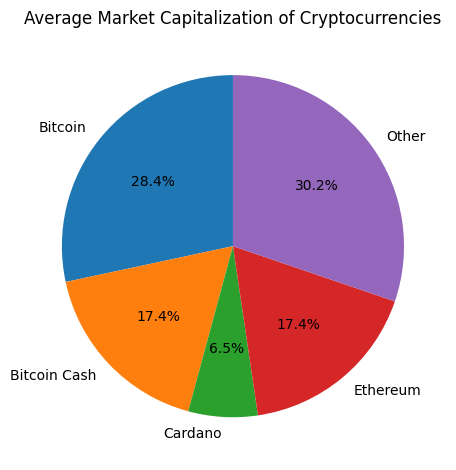

In [ ]:
ave_market = coins.groupby(['name'])['market'].mean()
print(ave_market.nlargest(1))
print(ave_market.nsmallest(1))
threshold = 0.05 * ave_market.sum()
pie_data = pd.DataFrame({'market_cap': ave_market})
pie_data['category'] = pie_data.index
pie_data.loc[pie_data['market_cap'] < threshold, 'category'] = 'Other'

grouped_pie_data = pie_data.groupby('category')['market_cap'].sum()
grouped_pie_data.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Average Market Capitalization of Cryptocurrencies')
plt.ylabel('')  # Remove the default ylabel
plt.tight_layout()
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
%pip install mplfinance
import mplfinance as mpf
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    filtered_df = coins[(coins['symbol'] == symbol) &
                 (coins['date'] >= start_date) &
                 (coins['date'] <= end_date)]
    filtered_df.set_index('date', inplace=True)
    #plt.figure(figsize=(15, 10))
    mpf.plot(filtered_df, type='candle', style='yahoo', figsize=(15, 10),
             title = 'Price of {} between {} and {}'.format(symbol, start_date, end_date), xlabel='Date', ylabel = 'Price')
    #filtered_df.loc[start_date:end_date]['price'].plot()
    #plt.grid(True)
    #plt.title('Price of {} between {} and {}'.format(symbol, start_date, end_date))
    #plt.xlabel('Date')
    #plt.ylabel('Price')
    #plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


Посмотрим, что получилось:

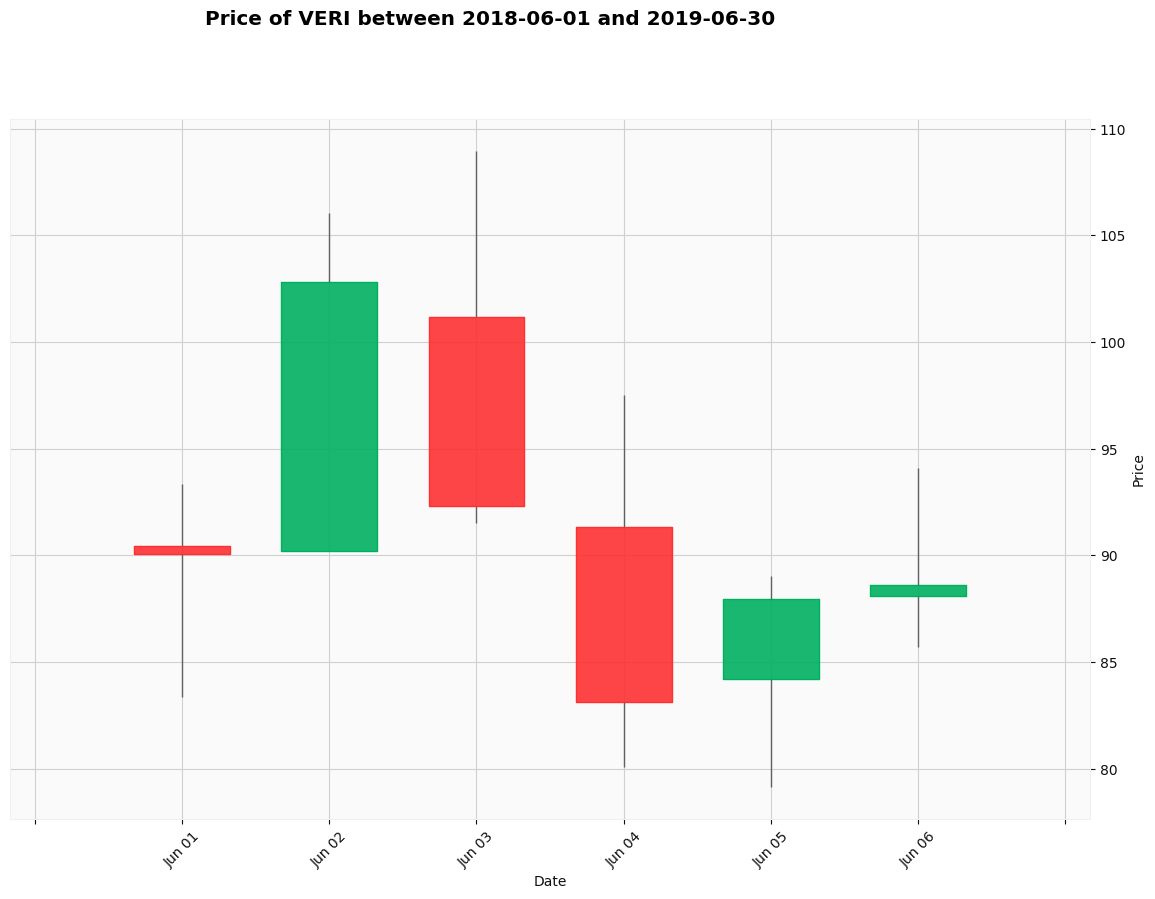

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2018-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  filtered_df = coins[(coins['symbol'] == symbol) &
                 (coins['date'] >= start_date) &
                 (coins['date'] <= end_date)]
  filtered_df = filtered_df.set_index('date')
  for date in filtered_df.index:
        filtered_df.loc[date, 'pnd'] = filtered_df.loc[date, 'price'] / max(filtered_df.loc[date, 'open'], filtered_df.loc[date, 'close'])
        out = filtered_df['pnd'].idxmax()
  return out, filtered_df.loc[out, 'pnd']


In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-06-04', 1.0)

Сравните эти значения для разных монет:

In [ ]:


import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
%pip install mplfinance
import mplfinance as mpf

def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  filtered_df = coins[(coins['symbol'] == symbol) &
                 (coins['date'] >= start_date) &
                 (coins['date'] <= end_date)]
  filtered_df = filtered_df.set_index('date')
  filtered_df['pnd'] = filtered_df['high'] / filtered_df[['open', 'close']].max(axis=1)
  max_pnd_date = filtered_df['pnd'].idxmax()
  max_pnd_value = filtered_df.loc[max_pnd_date, 'pnd']
  return max_pnd_date, max_pnd_value

# Example usage and comparison for different coins
coins = pd.read_csv("coins.csv")
coins['date'] = pd.to_datetime(coins['date'])

coins_to_compare = ['BTC', 'ETH', 'LTC']  # Add more coins as needed
start_date = '2017-06-01'
end_date = '2018-06-01'

for coin in coins_to_compare:
    date, pnd_value = find_most_severe_pump_and_dump(coins, symbol=coin, start_date=start_date, end_date=end_date)
    print(f"Coin: {coin}")
    print(f"  Most severe pump and dump date: {date}")
    print(f"  PND value: {pnd_value}")
    print("-" * 20)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.1 MB/s eta 0:00:00
Coin: BTC
  Most severe pump and dump date: 2017-11-29 00:00:00
  PND value: 1.1428940004366206
--------------------
Coin: ETH
  Most severe pump and dump date: 2017-07-18 00:00:00
  PND value: 1.1433508255471652
--------------------
Coin: LTC
  Most severe pump and dump date: 2018-02-07 00:00:00
  PND value: 1.1082257158899496
--------------------


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    filtered_df = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)].set_index('date')
    portfolio_value = sum(filtered_df['price'] * [investments.get(symbol, 0) for symbol in filtered_df['symbol']])
    initial_portfolio_value = sum(filtered_df['price'] * [investments.get(symbol, 0) for symbol in filtered_df['symbol']])
    roi = (portfolio_value - initial_portfolio_value) / initial_portfolio_value
    return roi

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    filtered_df = coins[(coins['date'] >= start_date) & (coins['date'] <= end_date)]

    initial_portfolio_value = 0
    final_portfolio_value = 0

    for symbol, investment_amount in investments.items():
        # Get the initial price for the symbol
        initial_price_row = filtered_df[(filtered_df['date'] == start_date) & (filtered_df['symbol'] == symbol)]
        if initial_price_row.empty:
            print(f"Warning: No data found for {symbol} on {start_date}. Skipping this investment.")
            continue  # Skip to the next investment if no data is found
        initial_price = initial_price_row['price'].iloc[0] # Access the 'price' value

        # Get the final price for the symbol
        final_price_row = filtered_df[(filtered_df['date'] == end_date) & (filtered_df['symbol'] == symbol)]
        if final_price_row.empty:
            print(f"Warning: No data found for {symbol} on {end_date}. Using the last available price.")
            final_price = filtered_df[filtered_df['symbol'] == symbol]['price'].iloc[-1] # Use the last available price
        else:
            final_price = final_price_row['price'].iloc[0]  # Access the 'price' value

        # Calculate portfolio values
        initial_portfolio_value += investment_amount
        final_portfolio_value += investment_amount * (final_price / initial_price)

    roi = (final_portfolio_value - initial_portfolio_value) / initial_portfolio_value
    return roi

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here and display the graph
    coin = coins[coins['symbol'] == symbol]
    price = coin['price']
    rolling_mean = price.rolling(window=window).mean()
    rolling_std = price.rolling(window=window).std()
    upper_band = rolling_mean + width * rolling_std
    lower_band = rolling_mean - width * rolling_std

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.set_title('Bollinger Bands for {}'.format(symbol))
    ax.plot(rolling_mean, color='blue', label='Moving Average')
    ax.plot(upper_band, color='green', label='Upper Band')
    ax.plot(lower_band, color='red', label='Lower Band')
    ax.plot(price, color='black', label='Price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

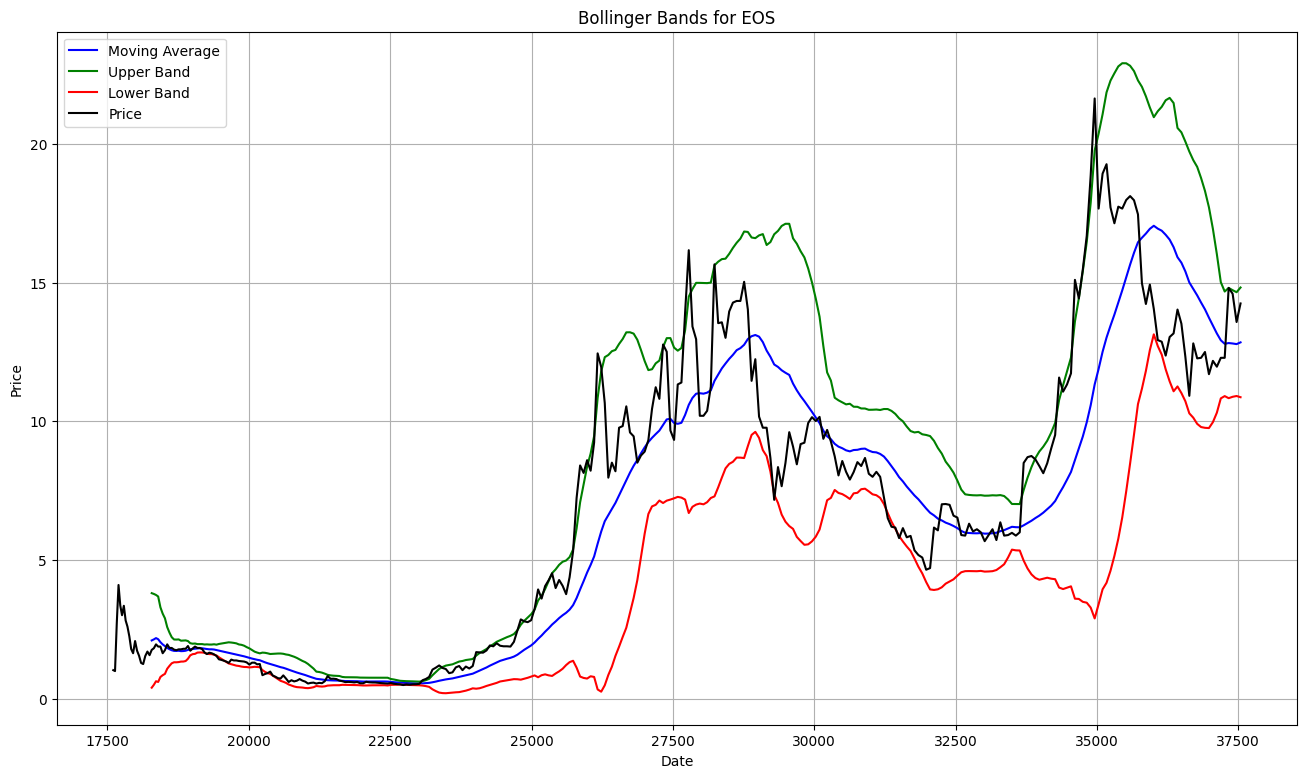

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Вы знаете, часто правило Боллинджера действительно выполнялось. Видны примеры, но все они принадлежат рынку в так называемом корридоре (период колебаний цены вниз-вверх в течение какого-то времени). Правило плохо работает в период бурного роста, к сожалению. Наверно, можно попробовать поймать движения в корридоре, пока они продолжаются и потерять сколько-то при выходе их корридора. Так сказать, не забывать про стоп-ордеры...

**Ваш ответ тут**

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
    # compute and plot market capitalizations as shares of total market capitalization
    coins['date'] = pd.to_datetime(coins['date'])
    coins = coins.set_index('date')
    coins['market'] = coins['market'].astype(float)
    coins = coins.reset_index()
    coins = coins[coins['date'] >= start_date]
    coins = coins[coins['symbol'].isin(symbols)]
    coins = coins.set_index('date')
    total_market_cap = coins['market'].sum()
    coins['market_share'] = coins['market'] / total_market_cap
    plt.figure(figsize=(16, 9))
    for symbol in symbols:
        plt.plot(coins[coins['symbol'] == symbol]['market_share'], label=symbol)



    '''filtered_df = coins[coins['date'] >= start_date]
    filtered_df = filtered_df[filtered_df['symbol'].isin(symbols)]
    filtered_df = filtered_df.set_index('date')
    # plot capitalizations shares
    filtered_df['market_share'] = filtered_df['market'] / filtered_df['market'].sum()
    plt.figure(figsize=(16, 9))
    for symbol in symbols:
        plt.plot(filtered_df[filtered_df['symbol'] == symbol]['market_share'], label=symbol)
    '''
    '''plt.figure(figsize=(16, 9))
    for symbol in symbols:
        plt.plot(filtered_df[filtered_df['symbol'] == symbol]['market'], label=symbol)
        # label chart
        plt.title('Cryptocurrency Market Capitalizations')'''
    plt.xlabel('Date')
    # fix x-axis labeling by including fewer data labels
    plt.xticks(rotation=45)
    import matplotlib.ticker as ticker

    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
    plt.ylabel('Market Capitalization (% of Market Total)')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()



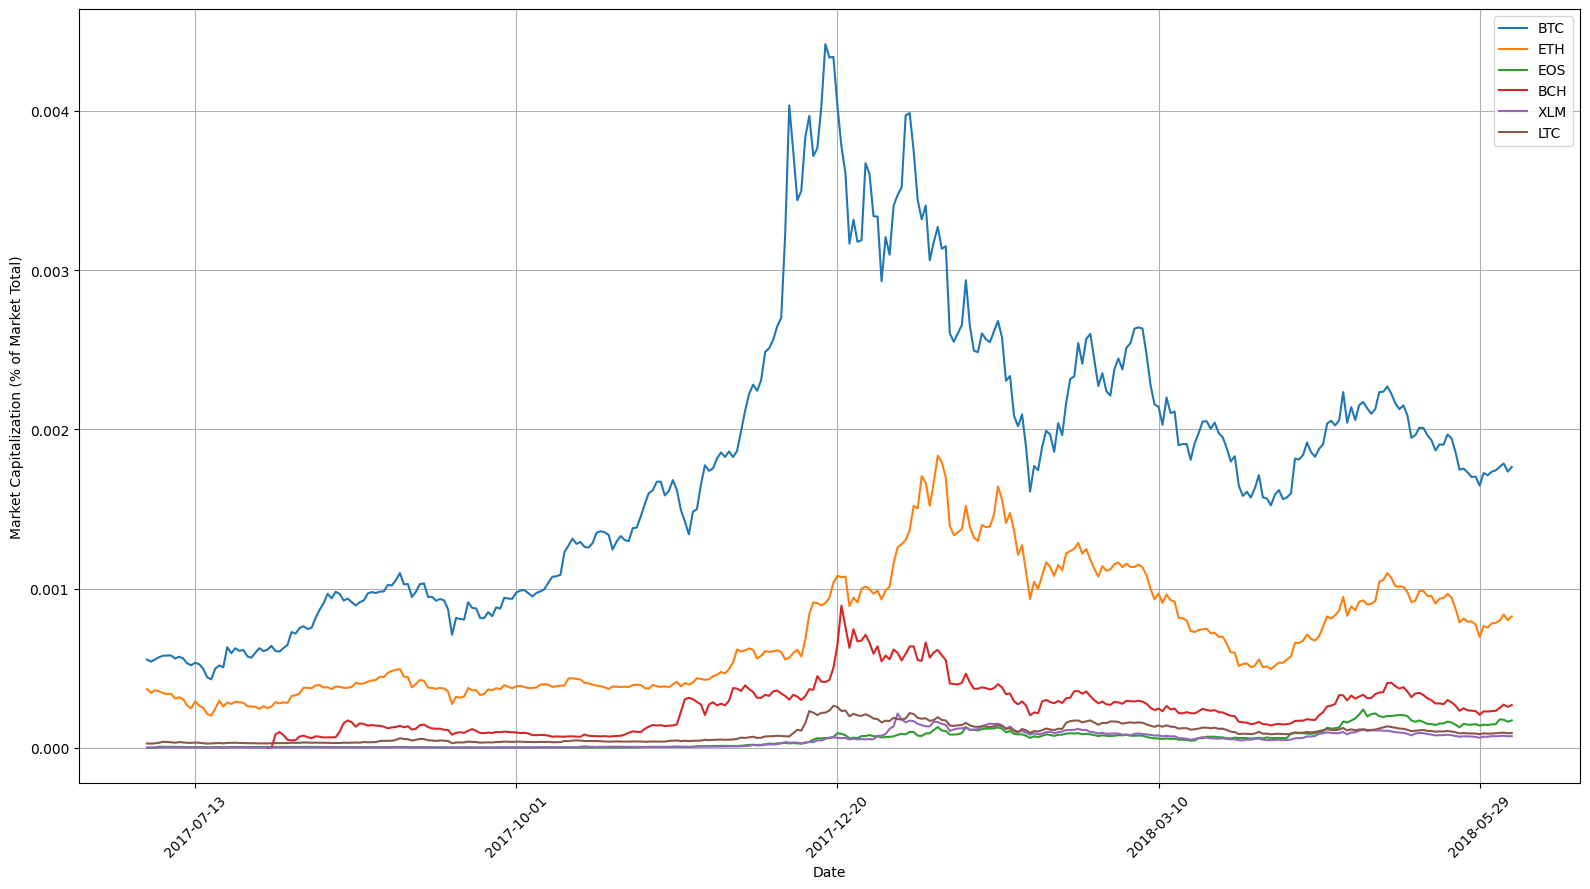

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**
Графики долей капитализации указанных продуктов указывают на лидирующие позиции Биткойн, т.к. другие основные игроки наращивают свои доли, как бы следуя за Биткойн с некоторым отрывом по датам. Но есть и мелкие игроки, которые не вырастают в капитализации вслед за биткойн (видимо совсем неперспективные).

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # We need to look at correlations between average market capitalization shares of symbols
    # We will look at average smoothing over the last window days since date with a smoothing coefficient alpha for a set of coins symbols
    # Write a function that returns a square dataframe
    # with numbers of rows and columns equal to the number of symbols
    # that lists correlations for these symbols
    coins['date'] = pd.to_datetime(coins['date'])
    filtered_coins = coins[coins['date'] <= date]
    filtered_coins = filtered_coins[filtered_coins['symbol'].isin(symbols)]

    # Calculate market share for each coin
    filtered_coins['market_share'] = filtered_coins.groupby('date')['market'].transform(lambda x: x / x.sum())

    # Calculate rolling correlations using a pivot table and a custom function
    def rolling_spearman(x):
        # Pivot the table to have symbols as columns
        pivot_table = x.pivot(columns='symbol', values='market_share')

        # Calculate correlation matrix and fill NaN values with 1
        correlation_matrix = pivot_table.corr(method='spearman').fillna(1)  # Fill NaN with 1

        # Return the lower triangle of the correlation matrix (excluding diagonal)
        return correlation_matrix.mask(np.equal(*np.indices(correlation_matrix.shape)))

    correlations = filtered_coins.groupby('date').apply(rolling_spearman)

    # Convert the index to Timestamp objects
    # Instead of directly converting the index, try to access the first
    # element of each tuple in the index (assuming it's the date)
    correlations.index = pd.to_datetime([x[0] for x in correlations.index])

    # Get the latest correlation matrix for the specified date
    correlations = correlations.loc[correlations.index <= pd.Timestamp(date)].iloc[-1]

    return correlations













In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    """
    Function to calculate the correlation matrix of market capitalization shares for the provided coin symbols.

    Parameters:
    coins (pd.DataFrame): A DataFrame with historical market capitalization data for each coin symbol.
                           It should have 'date' as the index and one column per coin symbol representing the market cap.
    date (str): The reference date from which we calculate the correlations.
    symbols (list): List of coin symbols to analyze.
    window (int): The number of days to use for the rolling window.
    alpha (float): The smoothing coefficient for the EWMA (Exponential Weighted Moving Average).

    Returns:
    pd.DataFrame: A square DataFrame with correlation coefficients between market capitalization shares.
    """
    # Filter the relevant data for the given symbols
    data = coins[symbols]

    # Ensure the data is ordered by date
    data = data.sort_index()

    # Calculate the total market cap for each day and then the market cap share for each symbol
    total_market_cap = data.sum(axis=1)
    market_cap_shares = data.div(total_market_cap, axis=0)

    # Compute the span based on alpha
    span = 2 / (alpha) - 1

    # Apply smoothing (EWMA) to the market cap shares using the calculated span
    smoothed_shares = market_cap_shares.ewm(span=span, adjust=False).mean()

    # Slice the data to consider only the last 'window' days before the 'date'
    end_date = pd.to_datetime(date)
    start_date = end_date - pd.Timedelta(days=window)
    smoothed_data = smoothed_shares.loc[start_date:end_date]

    # Calculate the correlation matrix of the smoothed market cap shares
    correlation_matrix = smoothed_data.corr()

    return correlation_matrix

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    """
    Function to calculate the correlation matrix of market capitalization shares for the provided coin symbols.

    Parameters:
    coins (pd.DataFrame): A DataFrame with historical market capitalization data for each coin symbol.
                           It should have 'date' as the index and one column per coin symbol representing the market cap.
    date (str): The reference date from which we calculate the correlations.
    symbols (list): List of coin symbols to analyze.
    window (int): The number of days to use for the rolling window.
    alpha (float): The smoothing coefficient for the EWMA (Exponential Weighted Moving Average).

    Returns:
    pd.DataFrame: A square DataFrame with correlation coefficients between market capitalization shares.
    """
    # Ensure 'date' is in datetime format
    coins['date'] = pd.to_datetime(coins['date'])

    # Filter the relevant data for the given symbols and date range
    filtered_coins = coins[coins['symbol'].isin(symbols)]
    filtered_coins = filtered_coins[filtered_coins['date'] <= date]

    # Calculate market share for each coin
    filtered_coins['market_share'] = filtered_coins.groupby('date')['market'].transform(lambda x: x / x.sum())

    # Pivot the table to have symbols as columns and market share as values
    pivot_table = filtered_coins.pivot_table(index='date', columns='symbol', values='market_share')

    # Compute the span based on alpha
    span = 2 / (alpha + 1e-10) - 1  # Added a small value to alpha to avoid division by zero

    # Apply smoothing (EWMA) to the market cap shares using the calculated span
    smoothed_shares = pivot_table.ewm(span=span, adjust=False).mean()

    # Slice the data to consider only the last 'window' days before the 'date'
    end_date = pd.to_datetime(date)
    start_date = end_date - pd.Timedelta(days=window)
    smoothed_data = smoothed_shares.loc[start_date:end_date]

    # Calculate the correlation matrix of the smoothed market cap shares
    correlation_matrix = smoothed_data.corr()

    return correlation_matrix

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm').set_precision(2)
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)
# or
# correlations.style.format(precision=2).background_gradient(cmap='coolwarm')

symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.98,-0.91,-0.57,-0.17,0.94,0.98
BCH,0.98,1.00,-0.95,-0.65,-0.05,0.93,0.95
BTC,-0.91,-0.95,1.00,0.70,-0.21,-0.80,-0.83
EOS,-0.57,-0.65,0.70,1.00,-0.54,-0.60,-0.48
ETH,-0.17,-0.05,-0.21,-0.54,1.00,-0.27,-0.34
LTC,0.94,0.93,-0.80,-0.60,-0.27,1.00,0.97
XLM,0.98,0.95,-0.83,-0.48,-0.34,0.97,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)

# Remove the unnecessary to_frame() call and directly transpose the DataFrame:
correlations = correlations.T  # Transpose to have symbols as columns

# Apply styling with format and precision
correlations.style.background_gradient(cmap='coolwarm').format(precision=2)

symbol,ADA,BCH,BTC,EOS,ETH,LTC,XLM
symbol,,,,,,,
ADA,1.00,0.50,-0.87,0.99,0.25,0.92,0.97
BCH,0.50,1.00,-0.84,0.41,0.85,0.18,0.32
BTC,-0.87,-0.84,1.00,-0.82,-0.68,-0.67,-0.75
EOS,0.99,0.41,-0.82,1.00,0.16,0.96,0.99
ETH,0.25,0.85,-0.68,0.16,1.00,-0.02,0.04
LTC,0.92,0.18,-0.67,0.96,-0.02,1.00,0.97
XLM,0.97,0.32,-0.75,0.99,0.04,0.97,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

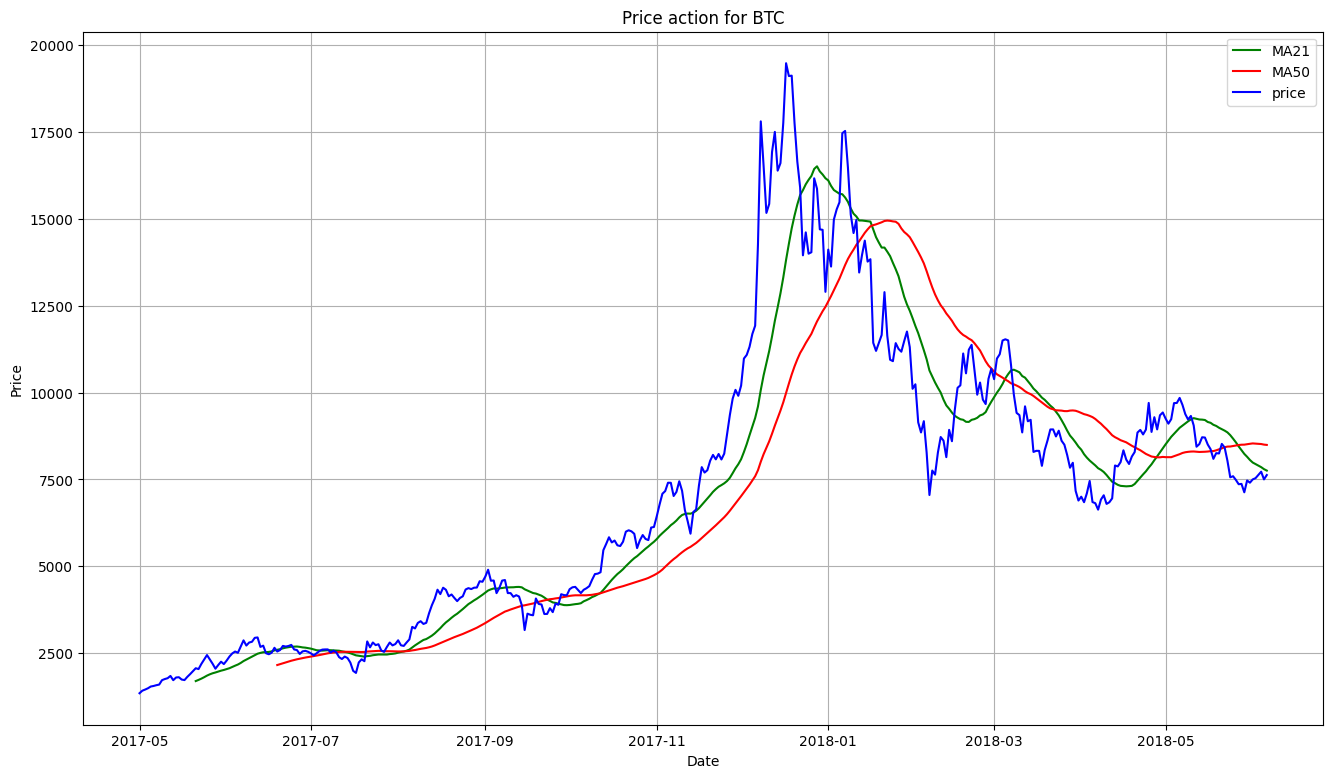

In [ ]:
'''def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()'''

def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    # Ensure 'date' is the index and convert dates to datetime objects
    coins['date'] = pd.to_datetime(coins['date'])
    coin = coins[coins['symbol'] == symbol].set_index('date')

    # Use .loc for slicing with datetime indices
    coin = coin.loc[start_date:end_date]

    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

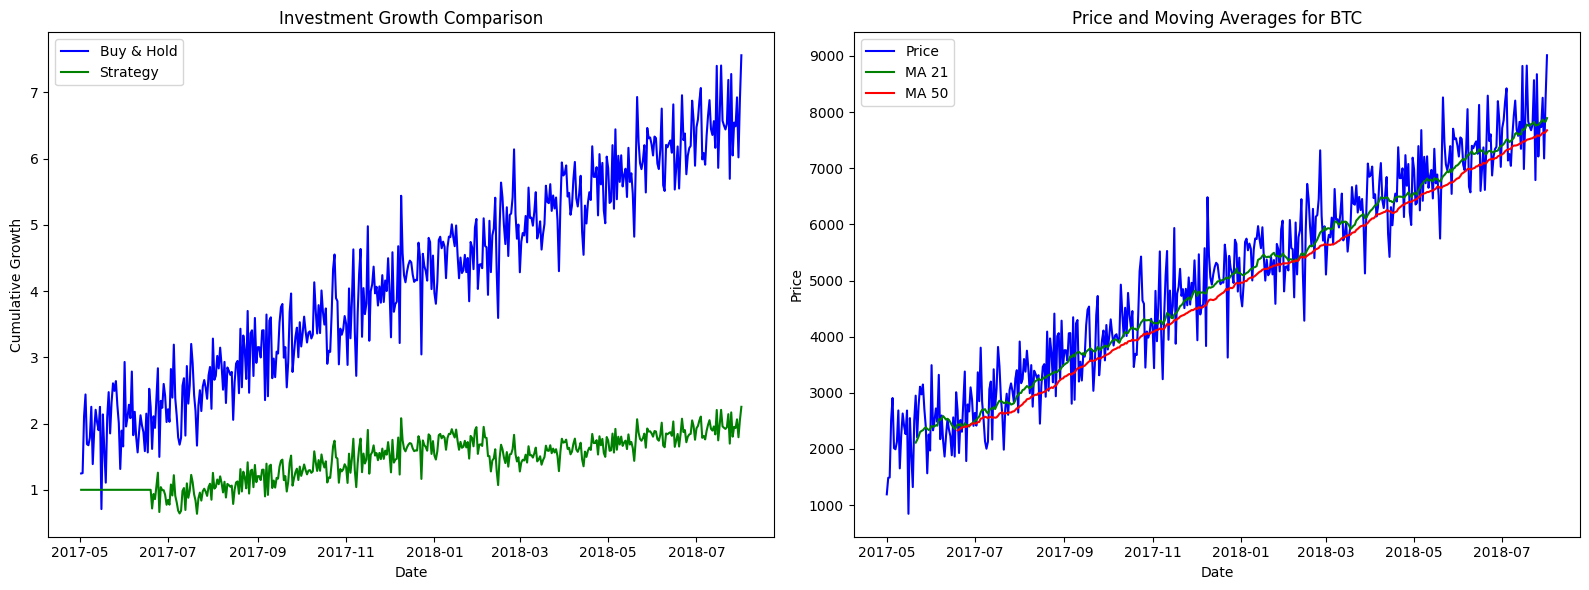

In [ ]:
coins.columns = coins.columns.str.strip()  # Ensure column names are consistent

# Now we can filter for the desired symbol, for example, 'BTC'
symbol = 'BTC'  # Change this to whatever symbol you need (e.g., 'BTC', 'LTC')
df = coins[coins['symbol'] == symbol].copy()

# Calculate the Moving Averages
lead_window = 21  # 21-day moving average
lag_window = 50  # 50-day moving average

# Use 'Price' column instead of 'close' (if 'Price' column exists)
# or use whatever column name represents the closing price in your DataFrame
df['MA21'] = df['price'].rolling(window=lead_window).mean()  # 21-day Moving Average
df['MA50'] = df['price'].rolling(window=lag_window).mean()  # 50-day Moving Average

# Define Buy and Sell Signals
df['Position'] = np.where(df['MA21'] > df['MA50'], 1, 0)  # 1 = Buy, 0 = Sell
df['Returns'] = df['price'].pct_change()  # Daily returns

# Calculate Strategy Returns
df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']  # Apply lag to avoid lookahead bias
df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()
df['Cumulative_BuyHold'] = (1 + df['Returns']).cumprod()

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left Plot: Cumulative Growth
axes[0].plot(df.index, df['Cumulative_BuyHold'], color='blue', label='Buy & Hold')
axes[0].plot(df.index, df['Cumulative_Strategy'], color='green', label='Strategy')
axes[0].set_title('Investment Growth Comparison')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Cumulative Growth')
axes[0].legend()

# Right Plot: Price and Moving Averages
axes[1].plot(df.index, df['price'], color='blue', label='Price') # Changed to 'price'
axes[1].plot(df.index, df['MA21'], color='green', label='MA 21')
axes[1].plot(df.index, df['MA50'], color='red', label='MA 50')
axes[1].set_title('Price and Moving Averages for {}'.format(symbol))
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
axes[1].legend()

# Display the final graph
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as ipywidgets

# Example of loading a DataFrame (replace this with your actual dataset)


# Check the column names to ensure 'price' exists
print(coins.columns)

# Define the function to plot moving averages and strategy
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    """
    Plot Buy & Hold vs Strategy growth and moving averages for a given coin dataset.

    Parameters:
        coins (DataFrame): The dataset containing coin prices.
        symbol (str): The symbol of the coin to analyze (e.g., 'BTC').
        lead_window (int): Window size for the short-term moving average.
        lag_window (int): Window size for the long-term moving average.
        threshold (float): Threshold for filtering signals (optional, unused here).
        start_date (str): Start date for the analysis (YYYY-MM-DD).
        end_date (str): End date for the analysis (YYYY-MM-DD).

    Returns:
        None: Displays the plot.
    """
    try:
        # Filter data for the specific coin and date range
        df = coins[(coins['symbol'] == symbol) &
                   (coins['date'] >= start_date) &
                   (coins['date'] <= end_date)].copy()

        # Check if DataFrame is empty
        if df.empty:
            raise ValueError("No data available for the specified symbol and date range.")

        # Ensure Date is in datetime format
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

        # Validate moving window sizes
        if lead_window >= len(df) or lag_window >= len(df):
            raise ValueError("Moving average windows are too large for the dataset size.")

        # Price and Moving Averages
        df['Price'] = df['price']  # Change 'close' to 'price' if column is 'price'
        df[f'MA_{lead_window}'] = df['Price'].rolling(window=lead_window, min_periods=1).mean()
        df[f'MA_{lag_window}'] = df['Price'].rolling(window=lag_window, min_periods=1).mean()

        # Define Strategy Logic
        df['Position'] = np.where(df[f'MA_{lead_window}'] > df[f'MA_{lag_window}'], 1, 0)
        df['Returns'] = df['Price'].pct_change()
        df['Strategy_Returns'] = df['Position'].shift(1) * df['Returns']

        # Calculate Cumulative Returns
        df['Cumulative_Strategy'] = (1 + df['Strategy_Returns']).cumprod()
        df['Cumulative_BuyHold'] = (1 + df['Returns']).cumprod()

        # Plot: Left -> Cumulative Growth, Right -> Price and Moving Averages
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Left Plot: Cumulative Growth
        axes[0].plot(df.index, df['Cumulative_BuyHold'], color='blue', label='Buy & Hold')
        axes[0].plot(df.index, df['Cumulative_Strategy'], color='green', label='Strategy')
        axes[0].set_title('Investment Growth Comparison')
        axes[0].set_xlabel('Date')
        axes[0].set_ylabel('Cumulative Growth')
        axes[0].legend()

        # Right Plot: Price and Moving Averages
        axes[1].plot(df.index, df['Price'], color='blue', label='Price')
        axes[1].plot(df.index, df[f'MA_{lead_window}'], color='green', label=f'MA {lead_window}')
        axes[1].plot(df.index, df[f'MA_{lag_window}'], color='red', label=f'MA {lag_window}')
        axes[1].set_title('Price and Moving Averages')
        axes[1].set_xlabel('Date')
        axes[1].set_ylabel('Price')
        axes[1].legend()

        # Display the final graph
        plt.tight_layout()
        plt.show()

    except ValueError as e:
        print(f"Error: {e}")
    except KeyError as e:
        print(f"Missing Column: {e}. Ensure 'date', 'symbol', and 'price' columns exist.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# Define interactive widgets (same as before)
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False
)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1,
    continuous_update=False
)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False
)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

# Create the interactive plot
ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),  # This assumes you have `coins` dataframe already loaded
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Index(['date', 'symbol', 'price'], dtype='object')


interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**
Поймать движения рынка, оптимизируя точки входа и выхода очень сложно. К тому же доступные исследования стратегий проводятся ретроспективно, а настоящие исследования должны быть проспективными. Тогда не будут накидывать подходящие средние на уже имеющиеся данные (по моему это называется overfitting, нет?), а увидят, что требования по параметрам скользящих средних меняются постоянно в реальном времени... По-моему так...

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.